In [1]:
# Some useful settings for interactive work
%load_ext autoreload
%autoreload 2

%matplotlib widget

import torch
torch.set_float32_matmul_precision('high')

In [2]:
# Import the relevant modules
import sousvide.synthesize.rollout_generator as rg
import sousvide.synthesize.observation_generator as og
import sousvide.instruct.train_policy as tp
import sousvide.visualize.plot_synthesize as ps
import sousvide.visualize.plot_synthesize as ps
import sousvide.visualize.plot_learning as pl
import sousvide.flight.deploy_figs as df

/home/admin/anaconda3/envs/kitchen/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.6' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [3]:
cohort = "experimental_same"

data_method = "eval_single"
eval_method = "eval_single"

scene = "mid_gate"

courses = ["traverse"]   

roster = [
    # "Iceman",
    # "hsCameron",
    # "hsSteiner",
    # "hsDavion",
    # "hsKurita",
    "clanGhostBear",
    # "clanJadeFalcon",
    # "clanNovaCat",
    # "clanSmokeJaguar",
    # "clanWolf",
    ]

In [ ]:
# Generate Rollouts
rg.generate_rollout_data(cohort,courses,scene,data_method)

# Review the Rollout Data
ps.plot_rollout_data(cohort)

In [6]:
# Generate initial observation data sets
og.generate_observation_data(cohort,roster)

Generating observation data with subsample ratio 1.0 for...
 Cohort : experimental_same
 Roster : ['clanGhostBear']
 Courses: ['traverse']

Output()

Using existing observation data...

Output()

======================================================================
Cohort : experimental_same              Network: histNet
======================================================================
----------------------------------------------------------------------
Student: clanGhostBear | Epochs: 10    | Data Size: 280.0/280.0                  
Time: 0h 0m 1s      | Train: 5.1618 | Test: 4.8682
======================================================================

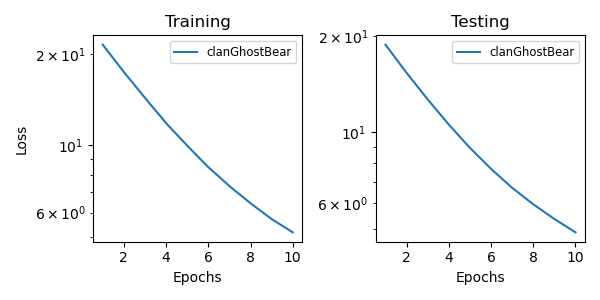

In [7]:
# Train the Policy
tp.train_roster(cohort,roster,"histNet",10)

pl.plot_losses(cohort,roster,"histNet",use_log=True)

Using existing observation data...

Output()

======================================================================
Cohort : experimental_same              Network: commNet
======================================================================
----------------------------------------------------------------------
Student clanGhostBear does not have a commNet.
======================================================================

/home/admin/Personal/Kitchen/src/sousvide/visualize/plot_learning.py:120: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right', fontsize='small')


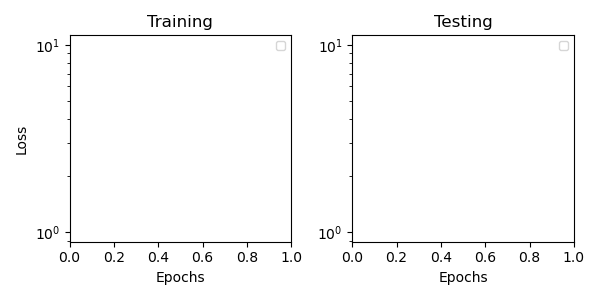

In [6]:
# Train the Policy
# tp.train_roster(cohort,roster,"commNet",200)
tp.train_roster(cohort,roster,"commNet",10,
                use_deploy=scene,deploy_method=eval_method,lim_sv=5)

pl.plot_losses(cohort,roster,"commNet",use_log=True)

In [ ]:
# Simulate in FiGS
for course in courses:
    # df.deploy_roster(cohort,course,scene,"test_eval",roster,mode="visualize")
    # df.deploy_roster(cohort,course,scene,"test_eval_same",roster,mode="visualize")
    metric = df.deploy_roster(cohort,course,scene,eval_method,roster,mode="evaluate")

    # pl.plot_deployments(cohort,course,roster,plot_show=True)
print(metric)